# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json 
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = url + "&appid=" + weather_api_key + "&q="

# Define an empty list with variables needed to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Check URL for debugging if needed
    #print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Convert the date format
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')                      
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinabang
Processing Record 2 of Set 1 | gondal
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | mermoz boabab
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | uruacu
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | tsetserleg
Processing Record 11 of Set 1 | kununurra
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | porto novo
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | kone
Processing Record 16 of Set 1 | westport
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | hobyo
Processing Record 19 of Set 1 | severo-yeniseyskiy
Processing Record 20 of Set 1 | tralee
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | aasiaat
Processing Record 23

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinabang,2.4803,96.3801,80.98,79,98,2.28,ID,1690417900
1,gondal,21.9667,70.8000,77.41,94,100,9.84,IN,1690417925
2,port-aux-francais,-49.3500,70.2167,40.03,77,90,38.70,TF,1690417925
3,mermoz boabab,14.7065,-17.4758,83.98,79,0,0.00,SN,1690417925
4,avarua,-21.2078,-159.7750,75.25,64,100,8.05,CK,1690417925


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,80.98,79,98,2.28,ID,1690417900
1,gondal,21.9667,70.8000,77.41,94,100,9.84,IN,1690417925
2,port-aux-francais,-49.3500,70.2167,40.03,77,90,38.70,TF,1690417925
3,mermoz boabab,14.7065,-17.4758,83.98,79,0,0.00,SN,1690417925
4,avarua,-21.2078,-159.7750,75.25,64,100,8.05,CK,1690417925


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

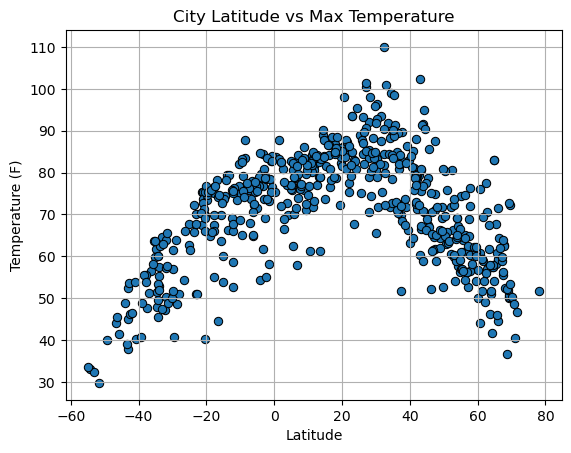

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

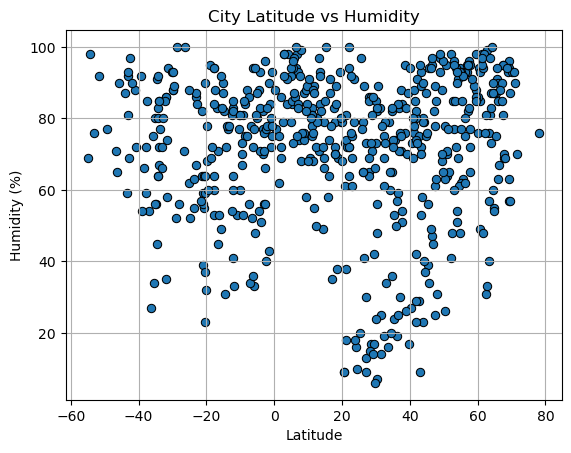

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

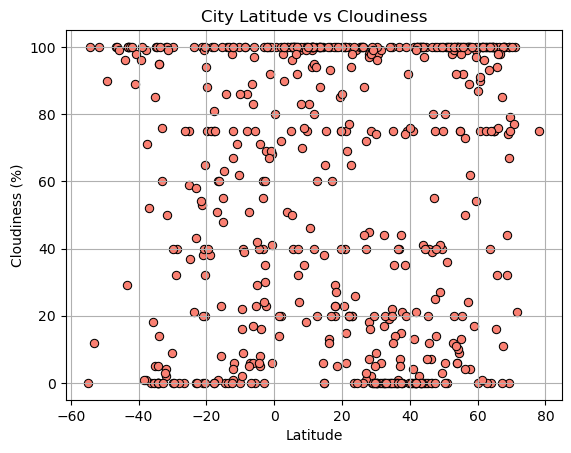

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

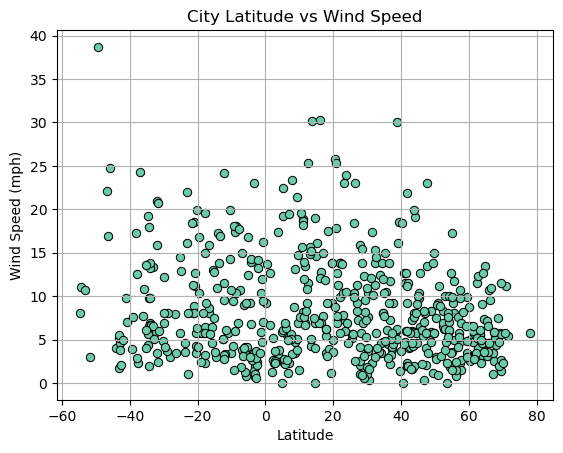

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,80.98,79,98,2.28,ID,1690417900
1,gondal,21.9667,70.8000,77.41,94,100,9.84,IN,1690417925
3,mermoz boabab,14.7065,-17.4758,83.98,79,0,0.00,SN,1690417925
9,tsetserleg,47.4750,101.4542,61.79,61,25,4.03,MN,1690417926
12,porto novo,6.4965,2.6036,78.62,94,100,5.50,BJ,1690417927


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,40.03,77,90,38.70,TF,1690417925
4,avarua,-21.2078,-159.7750,75.25,64,100,8.05,CK,1690417925
5,waitangi,-43.9535,-176.5597,48.81,87,96,4.00,NZ,1690417926
6,grytviken,-54.2811,-36.5092,33.17,98,100,11.05,GS,1690417926
7,uruacu,-14.5247,-49.1408,74.43,31,0,3.02,BR,1690417713


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.639


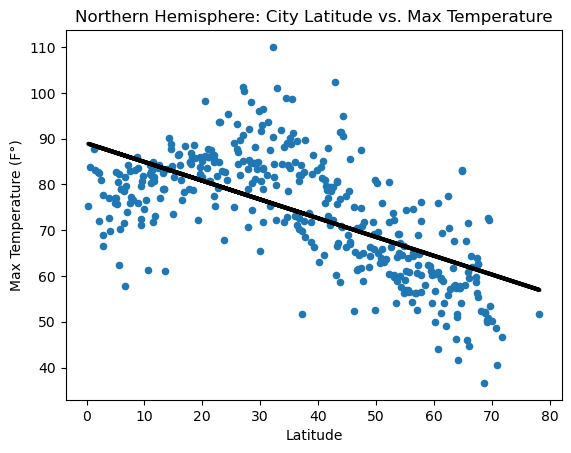

In [14]:
# Linear regression on Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F°)')
plt.show()

The r-squared is: 0.81


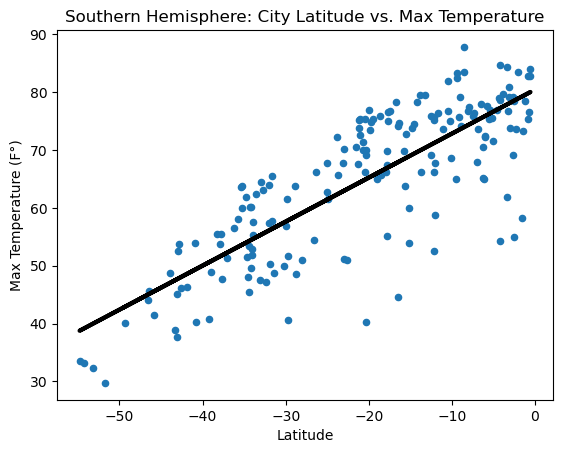

In [15]:
# Linear regression on Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F°)')
plt.show()

**Discussion about the linear relationship:** As you move further from the equator and closer to the poles the temperature will drop as expected. As we can see in this example however, the northern hemisphere is currently in it's summer and the values listed will be generally higher then the southern hemisphere. T

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.049


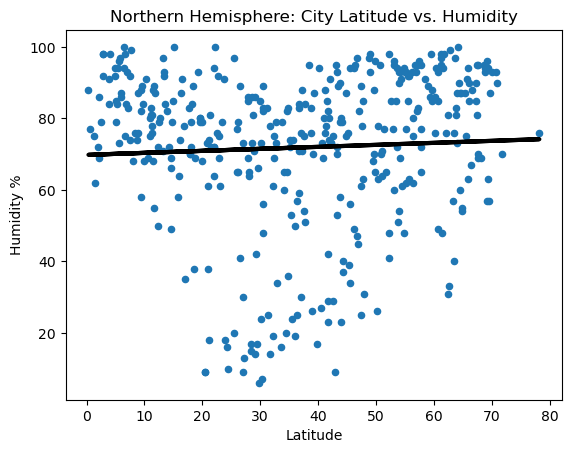

In [16]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

The r-squared is: -0.1


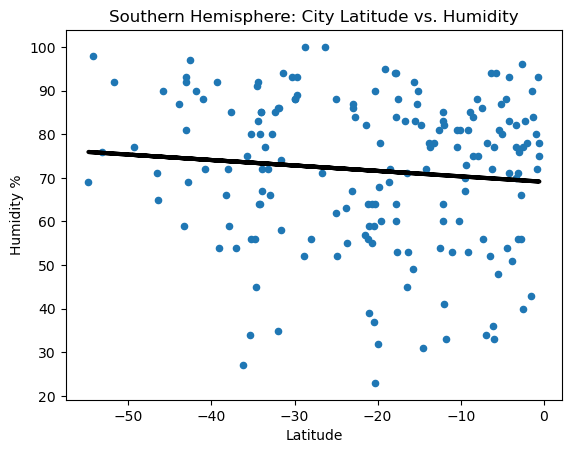

In [17]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

**Discussion about the linear relationship:** Although there is some correllation between humidity and how far you are from the equator, the largest variable here would be how close you are to a water source. Cities on the coast for example will have a higher humidity level then cities in the mountains.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.007


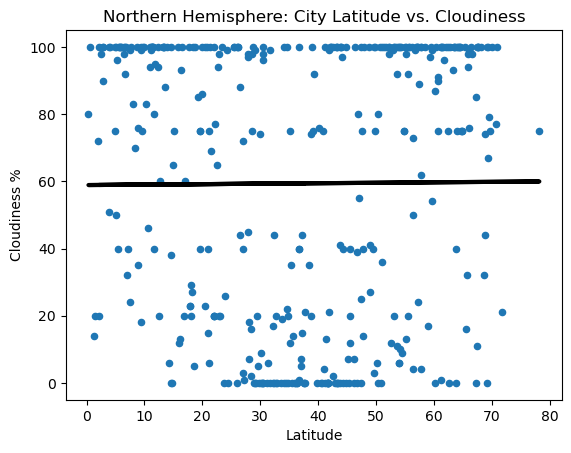

In [18]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

The r-squared is: -0.093


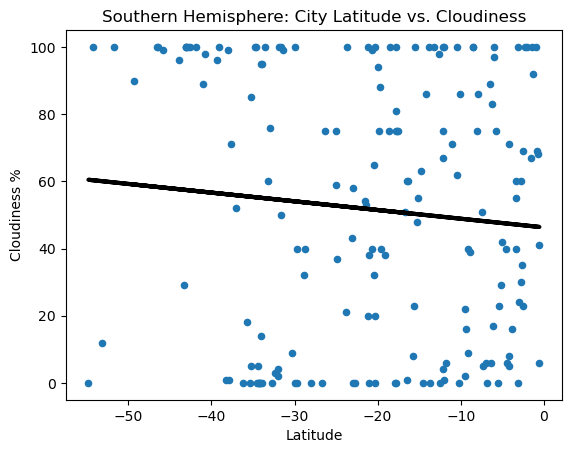

In [19]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

**Discussion about the linear relationship:** Cloudiness levels are different as you can clearly see that several observations are mostly made using a 0, 25, 50, 75, 100 scale. Other observations here would have to include current weather patterns for each city (hurricanes?), proximity to water sources (in a desert?) and several other factors that would make a definitive result difficult.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.247


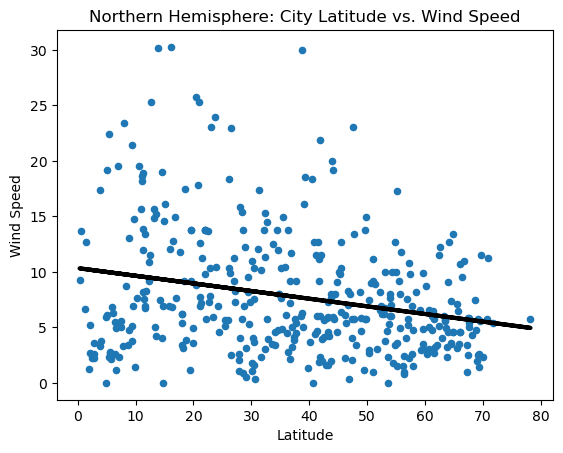

In [20]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)

plt.plot(
    northern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: -0.128


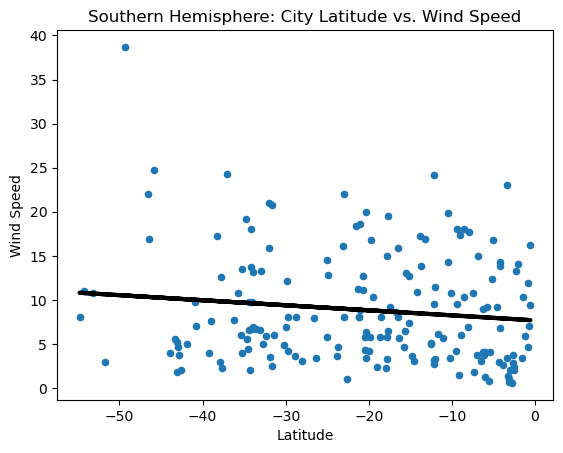

In [21]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)

plt.plot(
    southern_hemi_df['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** Wind speed, much like cloudiness depends on several factors that are not included in this data to show that there are definitive results.